# 1. Numpy 
Numpy is a powerful Python module that should be in the toolbelt of any AI/Deep learning practitioner. It provides functions and data structures that allow fast, efficient manipulation of mathematical structures like matrices and vectors. It represents these structures internally using Numpy arrays, which are like Python Lists, but highly optimised for calculations on large amounts of numerical data. Let's import this module now.

Numpy arrays are almost the exact same as Pytorch Tensors, which you will have heard about by now. The only difference is that Pytorch Tensors can be operated on by the GPU; Numpy array operations are always performed by the CPU.  

In [102]:
import numpy as np

### 1.1.1 Array creation
Numpy arrays can be created in a few different ways. Common ones are:
1. Instantiated using values from a normal Python list
2. Filled with sequential values upto a target number
3. Filled with a specific value
4. Filled with random values (various random distributions available) - see https://numpy.org/doc/stable/reference/random/index.html

For a full list of array creation routines, please see: https://numpy.org/doc/stable/reference/routines.array-creation.html


In [103]:
#Array creation from python list
python_list = [2, 4, 8, 16, 32]
np_from_list = np.array(python_list)
print(np_from_list)

[ 2  4  8 16 32]


In [104]:
#Array creation with sequential values 
seq_array = np.arange(start=10, stop=50, step=5)
seq_array

array([10, 15, 20, 25, 30, 35, 40, 45])

In [105]:
#Array creation with random values 
random_array = np.random.rand(20)
random_array

array([0.0558312 , 0.55795473, 0.85109954, 0.89719848, 0.81816223,
       0.99459988, 0.81678427, 0.68479151, 0.69150509, 0.08798084,
       0.33840512, 0.74235266, 0.75673493, 0.96929529, 0.393403  ,
       0.38768088, 0.67991731, 0.92771085, 0.16915778, 0.7987478 ])

In [106]:
#Array filled with the same specific value
filled_array = np.full(10, 256)
filled_array

array([256, 256, 256, 256, 256, 256, 256, 256, 256, 256])

### 1.1.2 Reshaping arrays

One of the many things that set Numpy arrays apart from Python lists is their `reshape` method. This allows you to define the number of dimensions that the structure represented by the array has. For example, the array `np_from_list` that we have just defined is just a flat list of numbers at the moment. `reshape` helps us represent it as a 2D data structure (a matrix). Keep in mind that the shape that you put into this method must agree with the number of elements in the array. In our example, the array has 10 elements, so acceptable shapes include:
* 5, 2
* 2, 5
* 1, 10
* 10, 1

In [107]:
matrix_5_2 = filled_array.reshape(5, 2)
print(matrix_5_2)
print(f"matrix has shape: {matrix_5_2.shape}")

[[256 256]
 [256 256]
 [256 256]
 [256 256]
 [256 256]]
matrix has shape: (5, 2)


In [108]:
matrix_2_10 = random_array.reshape(2, 10)
print(matrix_2_10)
print(f"matrix has shape: {matrix_2_10.shape}")

[[0.0558312  0.55795473 0.85109954 0.89719848 0.81816223 0.99459988
  0.81678427 0.68479151 0.69150509 0.08798084]
 [0.33840512 0.74235266 0.75673493 0.96929529 0.393403   0.38768088
  0.67991731 0.92771085 0.16915778 0.7987478 ]]
matrix has shape: (2, 10)


In [109]:
# You can also pass a desired shape into the array creation function to instantiate
# an array with a pre-defined shape
array_from_shape = np.full(matrix_5_2.shape, 32)
array_from_shape


array([[32, 32],
       [32, 32],
       [32, 32],
       [32, 32],
       [32, 32]])

### 1.1.3 Exercises

In [110]:
# Create a Numpy array A that contains the integers from 0 - 31 (32 elements long)
A = np.arange(32)
print(A)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]


In [111]:
# Create a Numpy array B that contains 12 random numbers between 0 and 1
B = np.random.rand(12)
print(B)

[0.99899732 0.26085224 0.69718724 0.04511611 0.66449267 0.34984788
 0.37932433 0.53465679 0.67605431 0.61273308 0.07041292 0.20024893]


In [112]:
# Turn A into a 2d matrix of shape (8, 4) - 8 rows, 4 columns
A = A.reshape(8, 4)
print(A)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]


In [113]:
# Turn B into a 2d matrix of shape (4, 3)
B = B.reshape(4, 3)
print(B)

[[0.99899732 0.26085224 0.69718724]
 [0.04511611 0.66449267 0.34984788]
 [0.37932433 0.53465679 0.67605431]
 [0.61273308 0.07041292 0.20024893]]


## 1.2 Array operations
Once you have created an array, there are various operations you may want to perform on them. We'll go through some of the most common ones in the next few cells.

### 1.2.1 Binary operators
Similar to normal counting numbers, Numpy arrays can be used as arguments to binary arithmetic operators like `*` (multiplication), `+` (addition), `-`(subtraction) and `/`(division). However, these can only be applied to arrays under certain conditions:
1. The arrays have the same shape, OR
2. The operation is between an array and a scalar, OR
3. The operations is between 2 arrays of different shapes that can be "broadcast" together - more on this later

These operations are applied **element-wise** meaning each element in the array is combined with its corresponding element at the same position in the other array

In [114]:
# Addition with a scalar
arr = np.random.rand(32).reshape(A.shape)
scalar_add = arr + 11
scalar_add

array([[11.90374858, 11.13704644, 11.99761466, 11.58659545],
       [11.93997586, 11.25169205, 11.39017383, 11.887816  ],
       [11.15400018, 11.14766971, 11.18396393, 11.79222709],
       [11.96812249, 11.44261924, 11.57567083, 11.15782329],
       [11.31233315, 11.90362521, 11.53315133, 11.74771463],
       [11.55444117, 11.1325504 , 11.29449117, 11.97480948],
       [11.60965251, 11.82979361, 11.56039823, 11.33596708],
       [11.35541464, 11.46476937, 11.86548446, 11.57900587]])

In [115]:
# Subtraction with another array of same shape
sub_array = arr - A
sub_array

array([[  0.90374858,  -0.86295356,  -1.00238534,  -2.41340455],
       [ -3.06002414,  -4.74830795,  -5.60982617,  -6.112184  ],
       [ -7.84599982,  -8.85233029,  -9.81603607, -10.20777291],
       [-11.03187751, -12.55738076, -13.42432917, -14.84217671],
       [-15.68766685, -16.09637479, -17.46684867, -18.25228537],
       [-19.44555883, -20.8674496 , -21.70550883, -22.02519052],
       [-23.39034749, -24.17020639, -25.43960177, -26.66403292],
       [-27.64458536, -28.53523063, -29.13451554, -30.42099413]])

In [116]:
# Multiplication with another array of same shape
mul_array = arr * A
mul_array

array([[ 0.        ,  0.13704644,  1.99522933,  1.75978636],
       [ 3.75990345,  1.25846026,  2.341043  ,  6.21471202],
       [ 1.23200144,  1.32902735,  1.83963933,  8.71449799],
       [11.61746987,  5.75405017,  8.0593916 ,  2.36734931],
       [ 4.99733037, 15.36162865,  9.59672399, 14.20657793],
       [11.08882332,  2.7835583 ,  6.4788058 , 22.42061797],
       [14.63166026, 20.74484037, 14.57035406,  9.07111113],
       [ 9.95160993, 13.47831168, 25.96453369, 17.94918188]])

In [117]:
# Division by a scalar
div_array = 11 / arr
div_array

array([[12.17152675, 80.2647599 , 11.02630144, 18.75227627],
       [11.70242817, 43.70420096, 28.19256207, 12.38995464],
       [71.42848803, 74.49056644, 59.79432937, 13.88490768],
       [11.36219861, 24.85205997, 19.10814212, 69.69820614],
       [35.21880424, 12.17318842, 20.6320407 , 14.71149498],
       [19.83979667, 82.98730437, 37.35256272, 11.28425632],
       [18.04306519, 13.25630832, 19.62889844, 32.74130323],
       [30.94976614, 23.66765271, 12.70964478, 18.99808037]])

### 1.2.2 Broadcasting
As long as an array's dimensions are compatible with their counterparts in the other array, they can be "broadcasted" together. This means that numpy will 'stretch' the smaller dimension along its axis so that element-wise operations can be applied between them. In general, 2 arrays can be broadcast together if each dimension in one array is compatible with its counterpart in the other array. Dimensions are compatible if they are equal or one of them is equal to 1. The dimension of size 1 is expanded to fit the size of its counterpart [https://numpy.org/doc/stable/user/basics.broadcasting.html]

In [118]:
B = np.arange(12).reshape(4, 3)
array_4_1 = np.arange(4).reshape(4, 1)
print(array_4_1)
print("--------")
print(B)
print("--------")

broadcasted = array_4_1 + B
print(broadcasted)

[[0]
 [1]
 [2]
 [3]]
--------
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
--------
[[ 0  1  2]
 [ 4  5  6]
 [ 8  9 10]
 [12 13 14]]


In [119]:
# Similarly, we can also broadcast an array of shape (1, 3) along B's vertical axis
array_1_3 = np.arange(3).reshape(1, 3)
print(array_1_3)
print("-------------")
print(B)
print("-------------")
broadcasted = B + array_1_3
broadcasted


[[0 1 2]]
-------------
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
-------------


array([[ 0,  2,  4],
       [ 3,  5,  7],
       [ 6,  8, 10],
       [ 9, 11, 13]])

### 1.2.3 Array products
Contrary to the `*` operator, which performs element-wise multiplication between the arrays, `np.matmul` is the matrix product of the arrays.

In [120]:
matmul_matrix = np.matmul(A, B)
print(f"A: {A.shape}, B: {B.shape}, A.B: {matmul_matrix.shape}")
print(matmul_matrix)

A: (8, 4), B: (4, 3), A.B: (8, 3)
[[ 42  48  54]
 [114 136 158]
 [186 224 262]
 [258 312 366]
 [330 400 470]
 [402 488 574]
 [474 576 678]
 [546 664 782]]


### 1.2.4 Exercises

In [121]:
# Divide your array B by the number 2.5. Store the result in a variable C
C = B / 2.5
print(C)

[[0.  0.4 0.8]
 [1.2 1.6 2. ]
 [2.4 2.8 3.2]
 [3.6 4.  4.4]]


In [122]:
# Create a new array filled with -1. The array must have the same shape as B. Store the result in a variable D
D = np.full(B.shape, -1)
print(D)

[[-1 -1 -1]
 [-1 -1 -1]
 [-1 -1 -1]
 [-1 -1 -1]]


In [123]:
# Multiply this new array ELEMENT-WISE with B and store the result in a variable called E.
E = D* B
print(E)

[[  0  -1  -2]
 [ -3  -4  -5]
 [ -6  -7  -8]
 [ -9 -10 -11]]


In [124]:
# Consider the intermediate array below. 
intermediate_arr = np.arange(4).reshape(2, 2)
print(intermediate_arr)

[[0 1]
 [2 3]]


In [125]:
# Try and multiply it with D element-wise. What happens? What could 
# you do to make this multiplication work? (hint: try and make
# the intermediate array broadcastable to C)
intermediate_arr = intermediate_arr.reshape(1, 4)
F = np.matmul(intermediate_arr, E)
print(F)

[[-42 -48 -54]]


## 1.3 Functions
Another useful thing we might want to do with an array is to apply a function to each element. Generally speaking, it is best to use the built-in Numpy functions to work on numpy arrays instead of defining your own. This is because Numpy functions are highly optimised for speed, which is important when working with large amounts of data. Chances are, whatever kind of mathematical operation you want to perform on a Numpy array is already built in. See below for a full list:  
https://numpy.org/doc/stable/reference/routines.math.html  

### 1.3.1 Element-wise functions
Common uses are applying trig functions to an array of values:

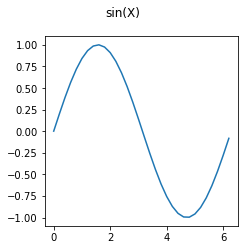

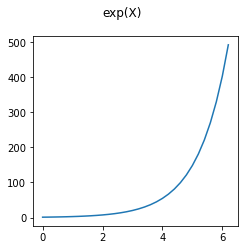

In [126]:
import matplotlib.pyplot as plt

def simple_plot(x, y, label):
    plt.plot(x, y)
    plt.suptitle(label)
    plt.show()

    

# Element-wise functions: 
X = np.arange(0, 2*np.pi, 0.2)
Y = np.sin(X)
simple_plot(X, Y, "sin(X)")

Y_1  = np.exp(X)
simple_plot(X, Y_1, "exp(X)")


### 1.3.2 Reduce functions
These are applied along the selected axis, consume all the elements and reduce the axis down to 1 element. If no axis is specified, the function is applied to the whole array, and reduces it to a scalar

In [127]:
# Max, mean minimun functions:
A = np.arange(32).reshape(8, 4)
print(A)
print("-----------")
I = A.max()
print(f"max: {I}")

I_2 = np.mean(A, axis=1, keepdims=True)
print(I_2)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]
-----------
max: 31
[[ 1.5]
 [ 5.5]
 [ 9.5]
 [13.5]
 [17.5]
 [21.5]
 [25.5]
 [29.5]]


### 1.3.3 Exercises


In [128]:
# Have a look at the trigonometric functions listed in the official numpy documentation: 
# https://numpy.org/doc/stable/reference/routines.math.html
# Pick any element-wise function that takes 1 numpy array as an argument and apply it to the following
# array. store the result in a variable called Ys
Xs = np.arange(-2*np.pi, 2*np.pi, 0.1)
Ys = np.tanh(Xs)
print(Ys)

[-0.99999303 -0.99999148 -0.9999896  -0.99998729 -0.99998448 -0.99998104
 -0.99997684 -0.99997172 -0.99996545 -0.99995781 -0.99994846 -0.99993706
 -0.99992312 -0.9999061  -0.99988531 -0.99985992 -0.99982891 -0.99979103
 -0.99974477 -0.99968827 -0.99961927 -0.99953499 -0.99943207 -0.99930637
 -0.99915286 -0.9989654  -0.99873648 -0.99845695 -0.99811564 -0.99769892
 -0.99719016 -0.99656913 -0.99581111 -0.99488605 -0.99375734 -0.99238047
 -0.99070133 -0.98865425 -0.98615966 -0.98312123 -0.97942267 -0.97492392
 -0.96945679 -0.96282015 -0.95477457 -0.94503671 -0.93327368 -0.91909789
 -0.90206306 -0.88166254 -0.85733128 -0.82845337 -0.79437734 -0.75444149
 -0.70801148 -0.65453119 -0.59358628 -0.52497672 -0.44879099 -0.36547052
 -0.27585058 -0.1811634  -0.08299396  0.01681311  0.11628624  0.21348
  0.30662392  0.39424359  0.47523785  0.54890634  0.61493237  0.67333244
  0.72438705  0.76856596  0.80645811  0.83871205  0.8659896   0.88893254
  0.90814095  0.92416076  0.93747833  0.94851987  0.95

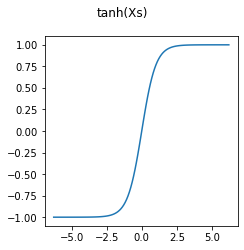

In [129]:
# Call our previously-defined simple plot function and display your result! Give the plot a suitable title
simple_plot(Xs, Ys, "tanh(Xs)")

In [130]:
# Use a suitable Numpy reduce function to find the maximum value of your function's result
max_val = Ys.max()
print(max_val)

0.9999920352594386


## 1.4 numpy.where
This allows us to conditionally modify the elements of an array, which can be useful for tasks like thresholding or masking.

In [131]:
big_image = np.arange(10*10).reshape(10, 10)
big_image_thresh = np.where(big_image < 50, 0, big_image / 2)
big_image_thresh

array([[ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [25. , 25.5, 26. , 26.5, 27. , 27.5, 28. , 28.5, 29. , 29.5],
       [30. , 30.5, 31. , 31.5, 32. , 32.5, 33. , 33.5, 34. , 34.5],
       [35. , 35.5, 36. , 36.5, 37. , 37.5, 38. , 38.5, 39. , 39.5],
       [40. , 40.5, 41. , 41.5, 42. , 42.5, 43. , 43.5, 44. , 44.5],
       [45. , 45.5, 46. , 46.5, 47. , 47.5, 48. , 48.5, 49. , 49.5]])

### 1.4.1 Exercises


In [132]:
# Create a Numpy array of shape (10, 5) and fill it with random values between 0 and 1. Store it in a variable called J
J = np.random.rand(10* 5).reshape(10, 5)
print(J)

[[0.87163067 0.29510891 0.75165945 0.55135109 0.09569675]
 [0.46090516 0.9579623  0.12648068 0.03449916 0.08861705]
 [0.97053682 0.63324143 0.35074232 0.98733841 0.81142608]
 [0.04222029 0.04999845 0.98029201 0.47929151 0.26781435]
 [0.61451358 0.48327363 0.62592263 0.64631053 0.04889921]
 [0.57206565 0.44718355 0.77988358 0.9708396  0.95868845]
 [0.4571169  0.08733939 0.83149753 0.79123784 0.03567614]
 [0.56933149 0.24462318 0.75180903 0.55798355 0.15373791]
 [0.59352978 0.32623847 0.74664981 0.27790879 0.25384295]
 [0.38577662 0.50372145 0.6600113  0.24711904 0.61008507]]


In [133]:
# Conditionally modify the array such that numbers below 0.5 are replaced with 0 and numbers above 
# or equal to 0.5 are replaced with 1. Store the result in a variable called K
K = np.where(J < 0.5, 0, 1)
print(K)

[[1 0 1 1 0]
 [0 1 0 0 0]
 [1 1 0 1 1]
 [0 0 1 0 0]
 [1 0 1 1 0]
 [1 0 1 1 1]
 [0 0 1 1 0]
 [1 0 1 1 0]
 [1 0 1 0 0]
 [0 1 1 0 1]]


## 1.5 Practical example

Putting everything together for a practical example, and visulalise the output of some Numpy operations

In [134]:
# Defining some helper functions
def plot_point(point):
    plt.rcParams["figure.figsize"] = [3.50, 3.50]
    plt.rcParams["figure.autolayout"] = True
    x = point[0]
    y = point[1]
    
    lims = 3
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.xlim(-lims, lims)
    plt.ylim(-lims, lims)
    plt.grid()
    ax.plot(x, y, marker="o", markersize=7, markeredgecolor="black", markerfacecolor="red")
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    plt.show()



# This function returns an np array that describes a 2d rotation 
# matrix [https://www1.udel.edu/biology/rosewc/kaap686/notes/matrices_rotations.pdf]. 
# These kinds of structures are often used in computer graphics to rotate and translate points in space
def get_rot_clockwise_matrix(angle):
    return np.array([
        [ np.cos(angle), np.sin(angle)],
        [-np.sin(angle), np.cos(angle)]
    ])

In [135]:
# Create a random 2-element array containing values from 0 - 1. Assign this array to a variable `p`
p = np.random.rand(2)
print(p)

[0.95283504 0.43576252]


In [136]:
# Use scalar multiplication to double the value of the elements in `p`. Assign the result back to `p`
p = 2 * p
print(p)

[1.90567007 0.87152504]


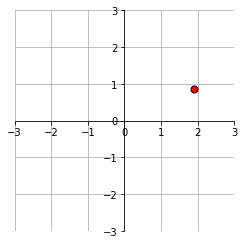

In [137]:
# Reshape `p` to be (2, 1), assign the result to `p` and plot the point.
p = p.reshape(2, 1)
plot_point(p)

In [138]:
# We will now rotate this point about the origin of the plot using the funciton we defined above
# This cell is just some setup for the rest of the exercise, just run it once
min_angle = np.pi/2 # 90 degrees
max_angle = np.pi   # 180 degrees
angle = np.random.uniform(min_angle, max_angle) # get a random angle between 90 and 180 degrees
print(np.degrees(angle)) # print the angle in degrees so we can check the rotation is correct!

126.41757241179826


In [139]:
# Call the previously-defined roation matrix function with the angle. Assign the result to 
# a variable called `rot90`
rot = get_rot_clockwise_matrix(angle)
print(rot)


[[-0.59366572  0.80471176]
 [-0.80471176 -0.59366572]]


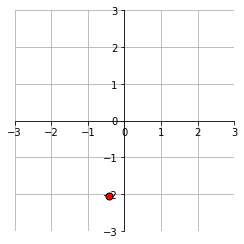

In [140]:
# Apply a matrix multiplication operation between rot90 and p. assign the result back to p and plot it.
p = np.matmul(rot, p)
plot_point(p)


In [141]:
# Create an array named `translation` which has the same shape as `p`, and fill it with 2's
translation = np.full(p.shape, 2)
print(translation)

[[2]
 [2]]


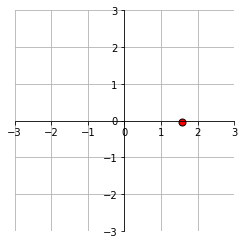

In [142]:
# Add this result to p and plot it!
p = p + translation
plot_point(p)
